In [7]:
import numpy as np
import ast
import re
import pandas as pd

data = pd.read_csv('data/linucb_states_and_best_actions.csv')
# Function to convert string representation of matrices and vectors to numpy array
def convert_to_numpy(array_str):
    # Remove all brackets and split the string based on spaces
    array_str = array_str.replace('[', '').replace(']', '').replace('\n', '').strip()
    # Convert string to float and form a numpy array
    return np.array(list(map(float, array_str.split())))

# Apply the function to each column that needs conversion
data['state'] = data['state'].apply(lambda x: convert_to_numpy(x).reshape(-1, 5))  # Assuming each state is a matrix with 5 columns
data['w_star'] = data['w_star'].apply(convert_to_numpy)

# Extracting the columns to numpy arrays
states = np.array(data['state'].tolist())
best_action_indices = data['best_action_index'].to_numpy()
w_stars = np.array(data['w_star'].tolist())

# Display the first entries to confirm successful conversion
states[0], best_action_indices[0], w_stars[0]


(array([[ 0.43634463,  0.6846304 , -0.42902521,  0.67876387,  0.88881154],
        [-0.42108129,  0.12144195, -0.92515599, -0.33169718, -0.01301566],
        [-0.90972851, -0.07045612, -0.42218514, -0.79228456, -0.15948859],
        [-0.34440441, -0.50584053,  0.54729953, -0.66475829,  0.42860766],
        [ 0.19990374,  0.75650635,  0.83899663, -0.66403197, -0.21949891],
        [ 0.54541513,  0.80304856, -0.67844335, -0.57140024,  0.15586707],
        [-0.07009843, -0.00759886, -0.55015921,  0.19442277,  0.92297646],
        [ 0.56441514, -0.25592309, -0.70327365,  0.89999479, -0.58565493],
        [ 0.2248587 , -0.08374903,  0.08278276,  0.62063971, -0.64759984],
        [-0.373507  ,  0.9906112 ,  0.17696599, -0.28972059, -0.67088283]]),
 0,
 array([0.32938476, 0.03968674, 0.09011821, 0.34351456, 0.1871271 ]))

Text(0, 0.5, 'Cumulative Regret')

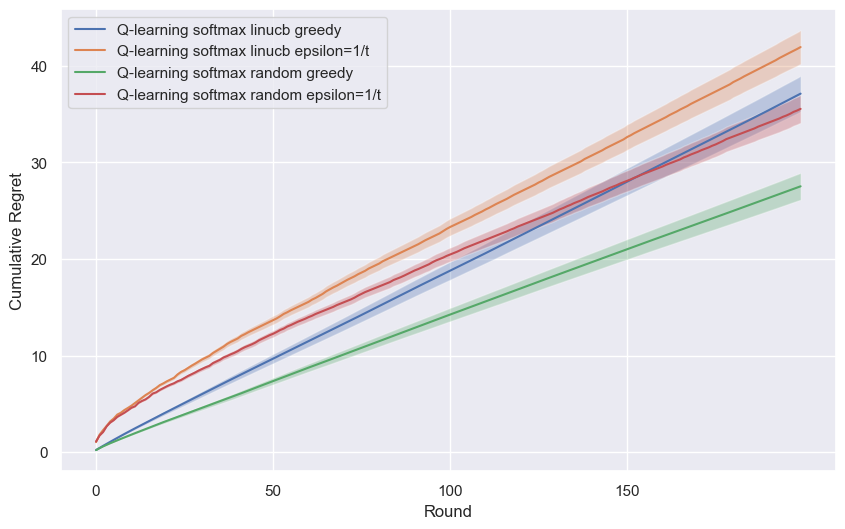

In [ ]:
# save the regrets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_regrets = pd.DataFrame(all_regrets)

# df_regrets.to_csv('data/Q-learning_softmax_linucb_greedy.csv', index=False)
# df_regrets.to_csv('data/Q-learning softmax linucb epsilon=1_sqrt(t).csv', index=False)
# df_regrets.to_csv('data/Q-learning softmax linucb epsilon=0_5_sqrt(t).csv', index=False)
# df_regrets.to_csv('data/Q-learning softmax linucb epsilon=0_4_sqrt(t).csv', index=False)
# df_regrets.to_csv('data/Q-learning softmax linucb epsilon=0_2_sqrt(t).csv', index=False)
# df_regrets.to_csv('data/Q-learning softmax linucb epsilon=1_t.csv', index=False)
# df_regrets.to_csv('data/Q-learning softmax linucb Boltzmann.csv', index=False)

# df_regrets.to_csv('data/Q-learning_softmax_random_greedy.csv', index=False)
# df_regrets.to_csv('data/Q-learning softmax random epsilon=1_sqrt(t).csv', index=False)
# df_regrets.to_csv('data/Q-learning softmax random epsilon=0_5_sqrt(t).csv', index=False)
# df_regrets.to_csv('data/Q-learning softmax random epsilon=1_t.csv', index=False)
# df_regrets.to_csv('data/Q-learning softmax random Boltzmann.csv', index=False)
# Boltzmann 

df_ucb_regrets_1 = pd.read_csv('data/Q-learning_softmax_linucb_greedy.csv')
df_ucb_regrets_2 = pd.read_csv('data/Q-learning softmax linucb epsilon=1_sqrt(t).csv')
df_ucb_regrets_3 = pd.read_csv('data/Q-learning softmax linucb epsilon=0_5_sqrt(t).csv')
df_ucb_regrets_4 = pd.read_csv('data/Q-learning softmax linucb epsilon=1_t.csv')
df_ucb_regrets_5 = pd.read_csv('data/Q-learning softmax linucb Boltzmann.csv')

df_random_regrets_1 = pd.read_csv('data/Q-learning_softmax_random_greedy.csv')
df_random_regrets_2 = pd.read_csv('data/Q-learning softmax random epsilon=1_sqrt(t).csv')
df_random_regrets_3 = pd.read_csv('data/Q-learning softmax random epsilon=0_5_sqrt(t).csv')
df_random_regrets_4 = pd.read_csv('data/Q-learning softmax random epsilon=1_t.csv')
# df_random_regrets_5 = pd.read_csv('data/Q-learning softmax random Boltzmann.csv')

df_linucb = pd.read_csv('data/linucb_regrets.csv')
# df_thompson = pd.read_csv('data/Thompson_regrets.csv')
df_transformer = pd.read_csv('data/transformer_regrets.csv')

T=200
sns.set()
plt.figure(figsize=(10, 6))

# 画一条(0,0)到(200, 90)的直线
# plt.plot([0, 200], [0, 93], color='black', linestyle='--', label='reference')
plt.plot(df_ucb_regrets_1.mean(), label='Q-learning softmax linucb greedy')
# plt.plot(df_ucb_regrets_2.mean(), label='Q-learning softmax linucb epsilon=1/sqrt(t)')
# plt.plot(df_ucb_regrets_3.mean(), label='Q-learning softmax linucb epsilon=0.5/sqrt(t)')
plt.plot(df_ucb_regrets_4.mean(), label='Q-learning softmax linucb epsilon=1/t')
plt.plot(df_regrets.mean( ), label='Q-learning softmax test')

plt.plot(df_random_regrets_1.mean(), label='Q-learning softmax random greedy')
# plt.plot(df_random_regrets_2.mean(), label='Q-learning softmax random epsilon=1/sqrt(t)')
# plt.plot(df_random_regrets_3.mean(), label='Q-learning softmax random epsilon=0.5/sqrt(t)')
plt.plot(df_random_regrets_4.mean(), label='Q-learning softmax random epsilon=1/t')
# plt.plot(df_random_regrets_5.mean(), label='Q-learning softmax random Boltzmann')

# plt.plot(df_linucb.mean(), label='LinUCB')
# plt.plot(df_thompson.mean(), label='Thompson Sampling')   
# plt.plot(df_transformer.mean(), label='Imitation Learning')

plt.fill_between(df_ucb_regrets_1.columns, df_ucb_regrets_1.mean() - df_ucb_regrets_1.std()/np.sqrt(len(df_ucb_regrets_1)), df_ucb_regrets_1.mean() + df_ucb_regrets_1.std()/np.sqrt(len(df_ucb_regrets_1)), alpha=0.3)
# plt.fill_between(df_ucb_regrets_2.columns, df_ucb_regrets_2.mean() - df_ucb_regrets_2.std()/np.sqrt(len(df_ucb_regrets_2)), df_ucb_regrets_2.mean() + df_ucb_regrets_2.std()/np.sqrt(len(df_ucb_regrets_2)), alpha=0.3)
# plt.fill_between(df_ucb_regrets_3.columns, df_ucb_regrets_3.mean() - df_ucb_regrets_3.std()/np.sqrt(len(df_ucb_regrets_3)), df_ucb_regrets_3.mean() + df_ucb_regrets_3.std()/np.sqrt(len(df_ucb_regrets_3)), alpha=0.3)
plt.fill_between(df_ucb_regrets_4.columns, df_ucb_regrets_4.mean() - df_ucb_regrets_4.std()/np.sqrt(len(df_ucb_regrets_4)), df_ucb_regrets_4.mean() + df_ucb_regrets_4.std()/np.sqrt(len(df_ucb_regrets_4)), alpha=0.3)

plt.fill_between(df_random_regrets_1.columns, df_random_regrets_1.mean() - df_random_regrets_1.std()/np.sqrt(len(df_random_regrets_1)), df_random_regrets_1.mean() + df_random_regrets_1.std()/np.sqrt(len(df_random_regrets_1)), alpha=0.3)
# plt.fill_between(df_random_regrets_2.columns, df_random_regrets_2.mean() - df_random_regrets_2.std()/np.sqrt(len(df_random_regrets_2)), df_random_regrets_2.mean() + df_random_regrets_2.std()/np.sqrt(len(df_random_regrets_2)), alpha=0.3)
# plt.fill_between(df_random_regrets_3.columns, df_random_regrets_3.mean() - df_random_regrets_3.std()/np.sqrt(len(df_random_regrets_3)), df_random_regrets_3.mean() + df_random_regrets_3.std()/np.sqrt(len(df_random_regrets_3)), alpha=0.3)
plt.fill_between(df_random_regrets_4.columns, df_random_regrets_4.mean() - df_random_regrets_4.std()/np.sqrt(len(df_random_regrets_4)), df_random_regrets_4.mean() + df_random_regrets_4.std()/np.sqrt(len(df_random_regrets_4)), alpha=0.3)
# plt.fill_between(df_random_regrets_5.columns, df_random_regrets_5.mean() - df_random_regrets_5.std()/np.sqrt(len(df_random_regrets_5)), df_random_regrets_5.mean() + df_random_regrets_5.std()/np.sqrt(len(df_random_regrets_5)), alpha=0.3)


plt.legend()
plt.xlabel('Round')
# ever 50 rounds set a x-tick
plt.xticks(np.arange(0, T, 50))
plt.ylabel('Cumulative Regret')


Text(0, 0.5, 'Cumulative Regret')

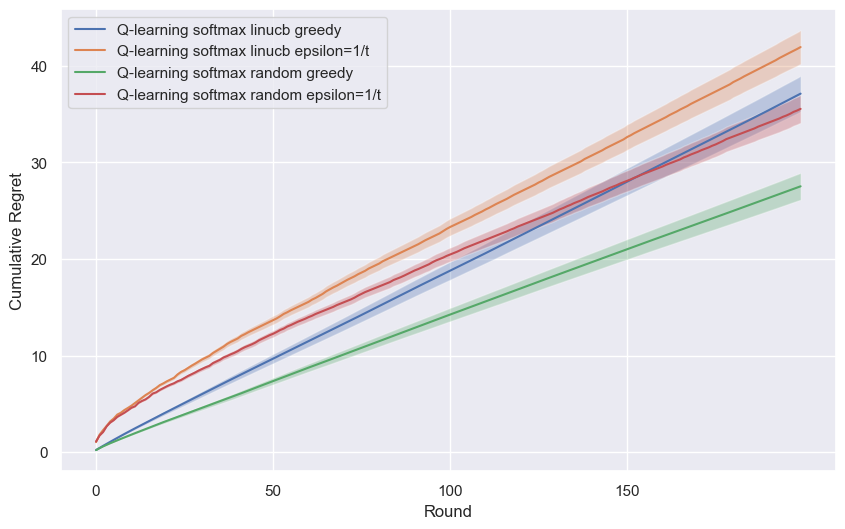

In [ ]:
# save the regrets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_regrets = pd.DataFrame(all_regrets)

# df_regrets.to_csv('data/Q-learning_softmax_linucb_greedy.csv', index=False)
# df_regrets.to_csv('data/Q-learning softmax linucb epsilon=1_sqrt(t).csv', index=False)
# df_regrets.to_csv('data/Q-learning softmax linucb epsilon=0_5_sqrt(t).csv', index=False)
# df_regrets.to_csv('data/Q-learning softmax linucb epsilon=0_4_sqrt(t).csv', index=False)
# df_regrets.to_csv('data/Q-learning softmax linucb epsilon=0_2_sqrt(t).csv', index=False)
# df_regrets.to_csv('data/Q-learning softmax linucb epsilon=1_t.csv', index=False)
# df_regrets.to_csv('data/Q-learning softmax linucb Boltzmann.csv', index=False)

# df_regrets.to_csv('data/Q-learning_softmax_random_greedy.csv', index=False)
# df_regrets.to_csv('data/Q-learning softmax random epsilon=1_sqrt(t).csv', index=False)
# df_regrets.to_csv('data/Q-learning softmax random epsilon=0_5_sqrt(t).csv', index=False)
# df_regrets.to_csv('data/Q-learning softmax random epsilon=1_t.csv', index=False)
# df_regrets.to_csv('data/Q-learning softmax random Boltzmann.csv', index=False)
# Boltzmann 

df_ucb_regrets_1 = pd.read_csv('data/Q-learning_softmax_linucb_greedy.csv')
df_ucb_regrets_2 = pd.read_csv('data/Q-learning softmax linucb epsilon=1_sqrt(t).csv')
df_ucb_regrets_3 = pd.read_csv('data/Q-learning softmax linucb epsilon=0_5_sqrt(t).csv')
df_ucb_regrets_4 = pd.read_csv('data/Q-learning softmax linucb epsilon=1_t.csv')
df_ucb_regrets_5 = pd.read_csv('data/Q-learning softmax linucb Boltzmann.csv')

df_random_regrets_1 = pd.read_csv('data/Q-learning_softmax_random_greedy.csv')
df_random_regrets_2 = pd.read_csv('data/Q-learning softmax random epsilon=1_sqrt(t).csv')
df_random_regrets_3 = pd.read_csv('data/Q-learning softmax random epsilon=0_5_sqrt(t).csv')
df_random_regrets_4 = pd.read_csv('data/Q-learning softmax random epsilon=1_t.csv')
# df_random_regrets_5 = pd.read_csv('data/Q-learning softmax random Boltzmann.csv')

df_linucb = pd.read_csv('data/linucb_regrets.csv')
# df_thompson = pd.read_csv('data/Thompson_regrets.csv')
df_transformer = pd.read_csv('data/transformer_regrets.csv')

T=200
sns.set()
plt.figure(figsize=(10, 6))

# 画一条(0,0)到(200, 90)的直线
# plt.plot([0, 200], [0, 93], color='black', linestyle='--', label='reference')
plt.plot(df_ucb_regrets_1.mean(), label='Q-learning softmax linucb greedy')
# plt.plot(df_ucb_regrets_2.mean(), label='Q-learning softmax linucb epsilon=1/sqrt(t)')
# plt.plot(df_ucb_regrets_3.mean(), label='Q-learning softmax linucb epsilon=0.5/sqrt(t)')
plt.plot(df_ucb_regrets_4.mean(), label='Q-learning softmax linucb epsilon=1/t')
plt.plot(df_regrets.mean( ), label='Q-learning softmax test')

plt.plot(df_random_regrets_1.mean(), label='Q-learning softmax random greedy')
# plt.plot(df_random_regrets_2.mean(), label='Q-learning softmax random epsilon=1/sqrt(t)')
# plt.plot(df_random_regrets_3.mean(), label='Q-learning softmax random epsilon=0.5/sqrt(t)')
plt.plot(df_random_regrets_4.mean(), label='Q-learning softmax random epsilon=1/t')
# plt.plot(df_random_regrets_5.mean(), label='Q-learning softmax random Boltzmann')

# plt.plot(df_linucb.mean(), label='LinUCB')
# plt.plot(df_thompson.mean(), label='Thompson Sampling')   
# plt.plot(df_transformer.mean(), label='Imitation Learning')

plt.fill_between(df_ucb_regrets_1.columns, df_ucb_regrets_1.mean() - df_ucb_regrets_1.std()/np.sqrt(len(df_ucb_regrets_1)), df_ucb_regrets_1.mean() + df_ucb_regrets_1.std()/np.sqrt(len(df_ucb_regrets_1)), alpha=0.3)
# plt.fill_between(df_ucb_regrets_2.columns, df_ucb_regrets_2.mean() - df_ucb_regrets_2.std()/np.sqrt(len(df_ucb_regrets_2)), df_ucb_regrets_2.mean() + df_ucb_regrets_2.std()/np.sqrt(len(df_ucb_regrets_2)), alpha=0.3)
# plt.fill_between(df_ucb_regrets_3.columns, df_ucb_regrets_3.mean() - df_ucb_regrets_3.std()/np.sqrt(len(df_ucb_regrets_3)), df_ucb_regrets_3.mean() + df_ucb_regrets_3.std()/np.sqrt(len(df_ucb_regrets_3)), alpha=0.3)
plt.fill_between(df_ucb_regrets_4.columns, df_ucb_regrets_4.mean() - df_ucb_regrets_4.std()/np.sqrt(len(df_ucb_regrets_4)), df_ucb_regrets_4.mean() + df_ucb_regrets_4.std()/np.sqrt(len(df_ucb_regrets_4)), alpha=0.3)

plt.fill_between(df_random_regrets_1.columns, df_random_regrets_1.mean() - df_random_regrets_1.std()/np.sqrt(len(df_random_regrets_1)), df_random_regrets_1.mean() + df_random_regrets_1.std()/np.sqrt(len(df_random_regrets_1)), alpha=0.3)
# plt.fill_between(df_random_regrets_2.columns, df_random_regrets_2.mean() - df_random_regrets_2.std()/np.sqrt(len(df_random_regrets_2)), df_random_regrets_2.mean() + df_random_regrets_2.std()/np.sqrt(len(df_random_regrets_2)), alpha=0.3)
# plt.fill_between(df_random_regrets_3.columns, df_random_regrets_3.mean() - df_random_regrets_3.std()/np.sqrt(len(df_random_regrets_3)), df_random_regrets_3.mean() + df_random_regrets_3.std()/np.sqrt(len(df_random_regrets_3)), alpha=0.3)
plt.fill_between(df_random_regrets_4.columns, df_random_regrets_4.mean() - df_random_regrets_4.std()/np.sqrt(len(df_random_regrets_4)), df_random_regrets_4.mean() + df_random_regrets_4.std()/np.sqrt(len(df_random_regrets_4)), alpha=0.3)
# plt.fill_between(df_random_regrets_5.columns, df_random_regrets_5.mean() - df_random_regrets_5.std()/np.sqrt(len(df_random_regrets_5)), df_random_regrets_5.mean() + df_random_regrets_5.std()/np.sqrt(len(df_random_regrets_5)), alpha=0.3)


plt.legend()
plt.xlabel('Round')
# ever 50 rounds set a x-tick
plt.xticks(np.arange(0, T, 50))
plt.ylabel('Cumulative Regret')


In [3]:
df = pd.read_csv('data/linucb_states_and_best_actions.csv')
df.head()

,state,best_action_index,w_star
0,[[ 0.43634463 0.6846304 -0.42902521 0.67876...,0,[0.32938476 0.03968674 0.09011821 0.34351456 0...
1,[[-0.26285486 0.61777137 0.88471139 -0.17032...,6,[0.26317401 0.08602677 0.13859459 0.11705344 0...
2,[[-0.53244288 -0.61043224 0.96668151 -0.11378...,1,[0.25247071 0.71548366 0.85463939 0.58798493 0...
3,[[-0.16471276 -0.31803122 -0.39094224 0.11296...,5,[0.30305689 0.89802962 0.66226101 0.01904441 0...
4,[[-0.59924363 0.65179181 0.43287477 0.73920...,2,[0.47577368 0.7022875 0.74058575 0.24296527 0...


In [4]:
state0 = df['state'][0]
state0

'[[ 0.43634463  0.6846304  -0.42902521  0.67876387  0.88881154]\n [-0.42108129  0.12144195 -0.92515599 -0.33169718 -0.01301566]\n [-0.90972851 -0.07045612 -0.42218514 -0.79228456 -0.15948859]\n [-0.34440441 -0.50584053  0.54729953 -0.66475829  0.42860766]\n [ 0.19990374  0.75650635  0.83899663 -0.66403197 -0.21949891]\n [ 0.54541513  0.80304856 -0.67844335 -0.57140024  0.15586707]\n [-0.07009843 -0.00759886 -0.55015921  0.19442277  0.92297646]\n [ 0.56441514 -0.25592309 -0.70327365  0.89999479 -0.58565493]\n [ 0.2248587  -0.08374903  0.08278276  0.62063971 -0.64759984]\n [-0.373507    0.9906112   0.17696599 -0.28972059 -0.67088283]]'

In [5]:
# transform the state into a np array
state0 = np.array(ast.literal_eval(state0))
state0



SyntaxError: invalid syntax. Perhaps you forgot a comma? (<unknown>, line 1)